100%|██████████| 12/12 [00:39<00:00,  3.26s/it]


{'hyper_param': (3, 10.0, False), 'dim_poly': [2], 'loss': 3699.714338178315, 'mdl': 6585.310039900067, 'mdl_s': 6585.310039900067, 'err': 4.24030866278555}
loss: 3699.714338178315, mdl: 6585.310039900067
lambda: 10.0
process time: 2.0537324619999993
dim: 2, k: 3
iter_num: 49


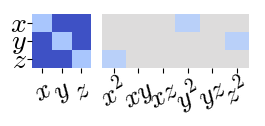

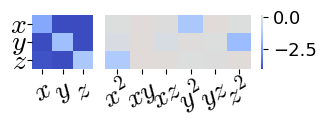

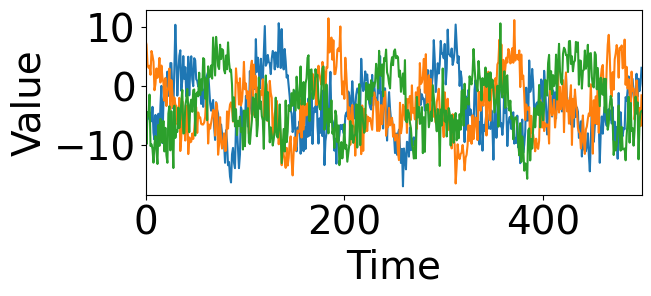

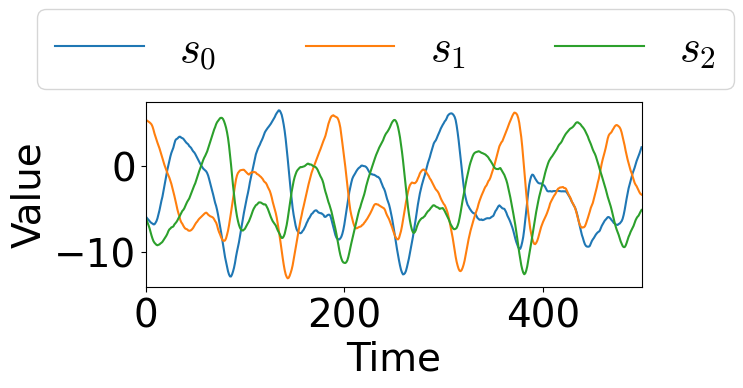

In [1]:
from src import LaNoLem, plot_result
from src.Dysts_dataset import Data
import matplotlib.pyplot as plt
%matplotlib inline

Dataset = Data()
data_name='Halvorsen'
data = Dataset.make_each_data(data_name, noise_list=[0.5], seed_list=[19])[0.5][19]
setting = Dataset.make_setting(data_name)
model = LaNoLem(verbose=True, print_log=True)
model.random_state = 42
model = model.fit(data,fit_type='Robust', max_iter=50)
plot_result(model, data, setting, fsize=3.3)
plt.show()

100%|██████████| 12/12 [00:44<00:00,  3.67s/it]


{'hyper_param': (3, 50.0, False), 'dim_poly': [2], 'loss': -2366.7423200222775, 'mdl': 69.33745787659768, 'mdl_s': 69.33745787659768, 'err': 1.1125027495901991}
loss: -2366.7423200222775, mdl: 69.33745787659768
lambda: 50.0
process time: 2.9838116449999994
dim: 2, k: 3
iter_num: 49


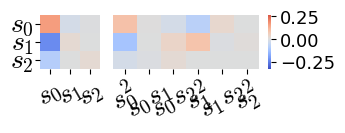

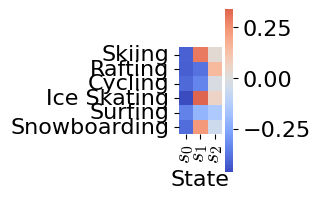

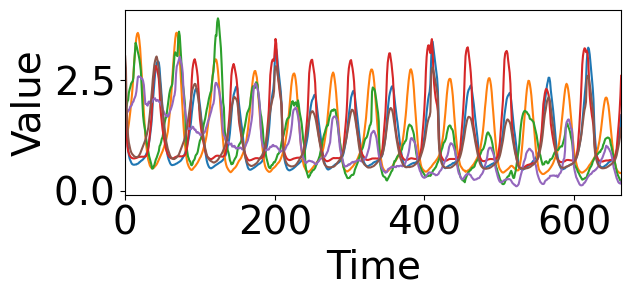

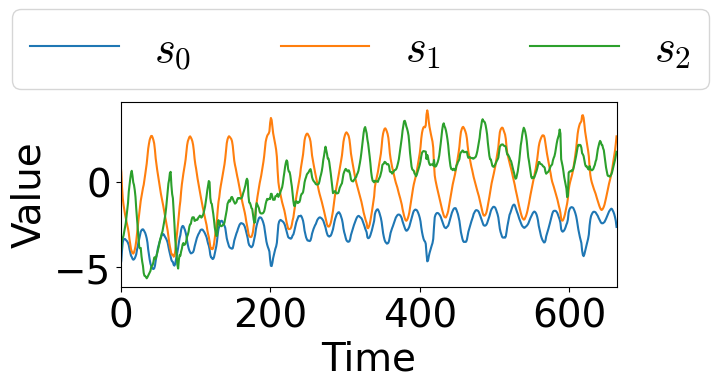

In [2]:
from src import LaNoLem, plot_result, make_data
import matplotlib.pyplot as plt
%matplotlib inline
data_name = 'outdoor'
data, setting = make_data.make_data(data_name)
model = LaNoLem(verbose=True, ptol=1e-10, print_log=True)
model.random_state = 42
model = model.fit(data, k = 3,
                  fit_type='Latent', max_iter=50)
plot_result(model, data, setting, fsize=3.3)

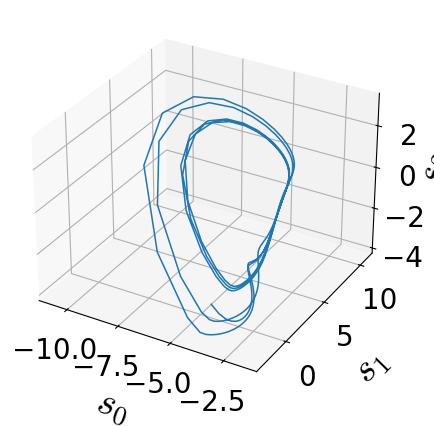

In [3]:
%matplotlib inline
plt.style.use('seaborn-v0_8-paper')
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12, 6))
Sta, _ = model.gen()
# Sta = model.Ez
x = Sta[:, 0]
y = Sta[:, 1]
z = Sta[:, 2]
# 位相平面
ax = fig.add_subplot(122, projection='3d')
ax.plot(x, y, z, lw=1.1)
ax.set_xlabel('$s_0$', labelpad=15, fontsize=28)
ax.set_ylabel('$s_1$', labelpad=15, fontsize=28)
ax.set_zlabel('$s_2$', labelpad=15, fontsize=28)
ax.tick_params(labelsize=20)
ax.zaxis.labelpad = 5
plt.subplots_adjust(left=0.001, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout(rect=[0.05, 0.05, 0.8, 1.0])
plt.savefig(f"result/Latent/outdoor/latent_state.pdf", bbox_inches='tight', pad_inches=0.5, transparent=True)
plt.show()